## How many times made and how many times declined

In this Notebook we analyse the most made exercises, based on this data we find out where the most mistakes are being made


#### Importing needed libraries and loading the data

In [1]:
# Importing all used libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Loading in all our data files
read_linting_results = pd.read_csv('data/blast_linting_results.csv')
read_review_test_results = pd.read_csv('data/blast_review_test_results.csv')
read_reviews = pd.read_csv('data/blast_reviews.csv')
read_code_blast_tests = pd.read_csv('data/code_blast_tests.csv')
read_exercises = pd.read_csv('data/exercises.csv')
data_implementation_exercise = pd.read_csv('data/implementation_exercise.csv')

#### Cleaning the data

We clean the data so we are only left with the data we want to use.

In [1]:
# Cleaned read_linting_results to data_linting_result.
data_linting_result_warning= read_linting_results[['blast_review_id', 'file_name', 'message', 'type', 'line', 'column']]
data_linting_result = data_linting_result_warning[data_linting_result_warning['type'].str.lower().isin(['error'])]

# Cleaned read_review_test_results to data_review_test_results
data_review_test_results = read_review_test_results[['blast_review_id', 'test_id', 'human_error_message', 'test_language']]

# Cleaned read_reviews to data_reviews
data_reviews = read_reviews[['id', 'implementation_id', 'state', 'created_on']]

#Cleaned read_exercises to data_exercises
data_exercises = read_exercises[['id', 'title', 'files_to_turn_in']]

# Cleaned read_code_blast_tests to data_code_blast_tests
data_code_blast_tests = read_code_blast_tests[['id', 'exercise_id', 'title', 'test_type', 'created_on', 'language']]


NameError: name 'read_linting_results' is not defined

#### How many times each exercise?

This code provides us with data of how many times a exercise has been made.

In [3]:
# Merge data_implementation_exercise and data_exercises together
merged_data = pd.merge(data_implementation_exercise, data_exercises, left_on='exercise_id', right_on='id', how='left')

# Group the data based on exercise title and count the amount of exercises made
exercise_counts = merged_data.groupby(['id', 'title']).size().reset_index(name='count')

# We created a filter that only shows us the exercises that has been made more than 500 times.
exercise_counts = exercise_counts[exercise_counts['count'] > 500]

# Keep only the exercise titles with the highest count for each ID
exercise_counts_sorted = exercise_counts.sort_values(by=['count'], ascending=False).drop_duplicates('id')

# Print the final result
print(exercise_counts_sorted[['title', 'count']])




                              title  count
1387  Folders, Files and Structure!  28488
613                    Lintjesregen  21904
389            One Size Fits Nobody  16488
1553                          Input  14580
858               Divide and Style!  14392
...                             ...    ...
670       Fake It 'til You Make It!    520
1284               Play that sound!    518
1146   Putting the Fun in Function!    512
57                         Wildcard    504
1507                   Scope it out    504

[309 rows x 2 columns]


In the output above we get our first insight about all exercises that have been made more than 500 times. We created this filter bases on the bump in amount of exercises made that we saw when we created a barplot showing all exercises.

#### Top 100 exercises that got declined the most

From all exercises with have been made more than 500 times, we wanted to see a top 100 of these that got declined the most to get a better idea what exercises might be too hard or need change

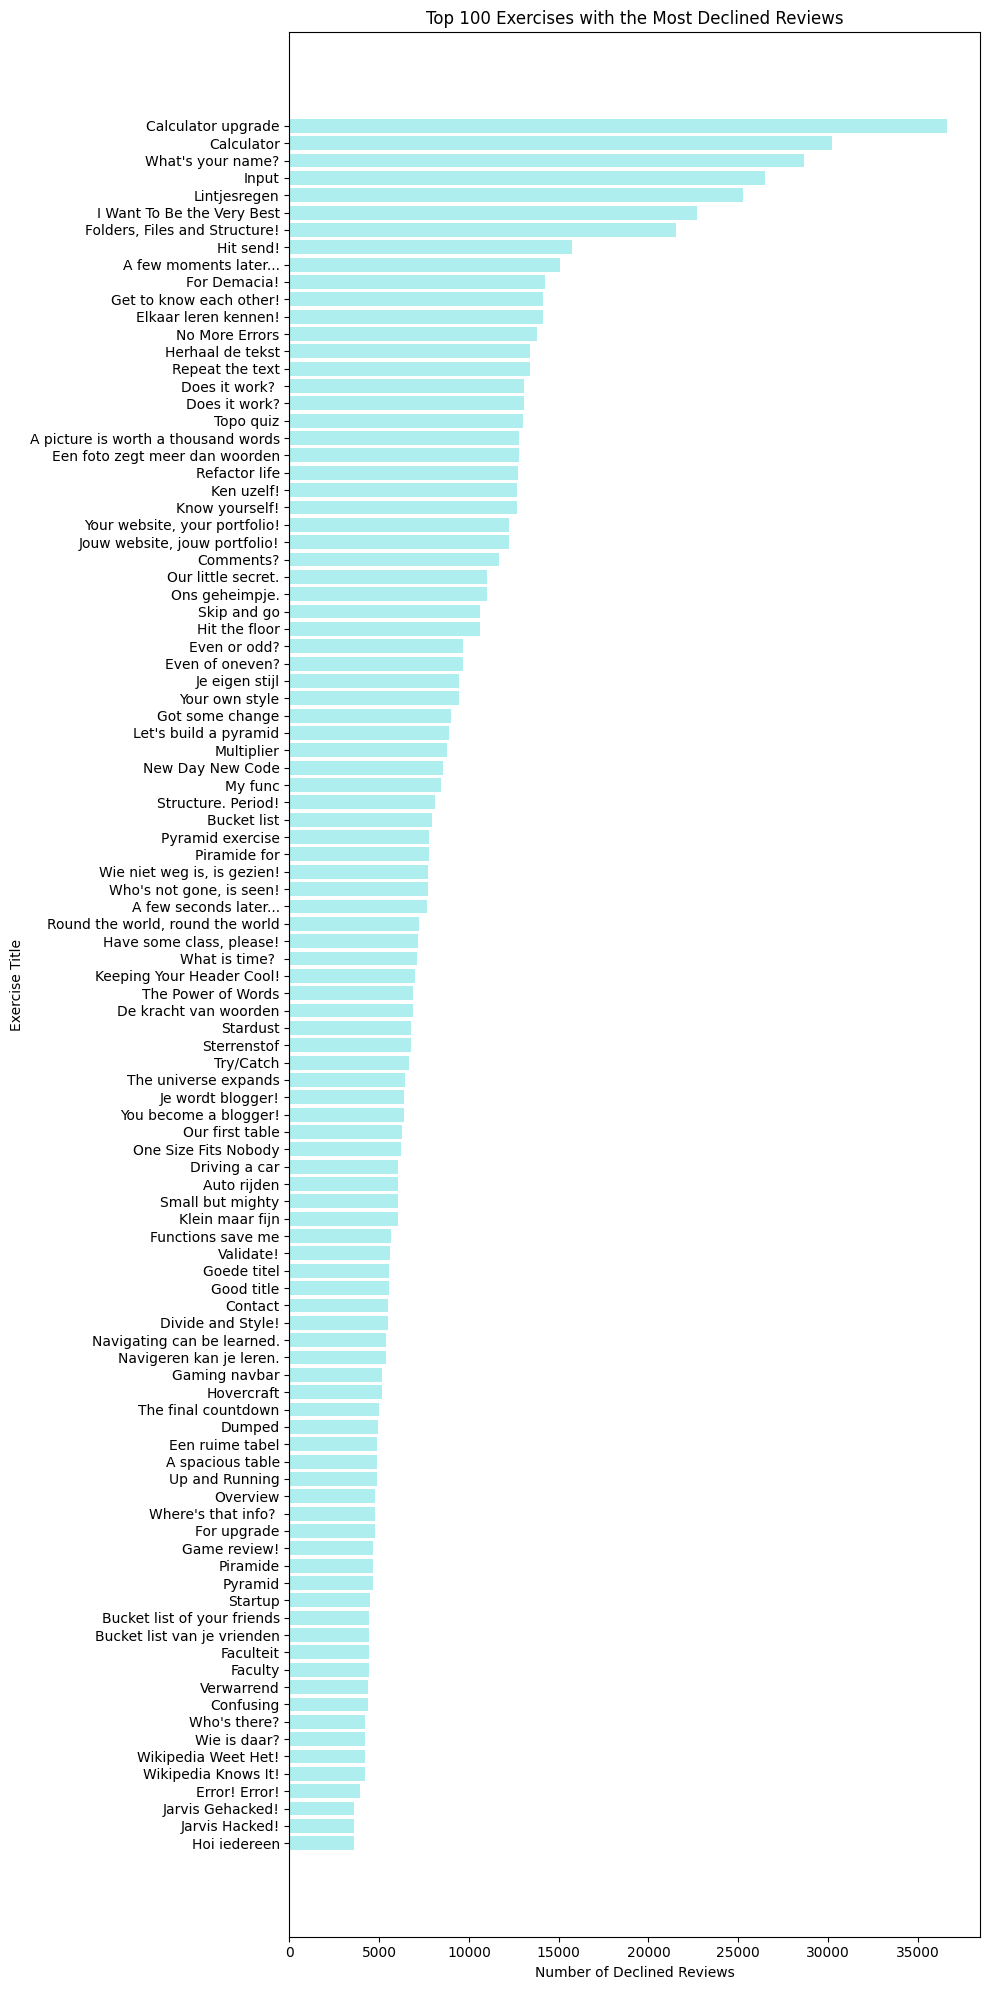

In [12]:
import pandas as pd

# Filter data_reviews for entries with 'DECLINED' state
declined_reviews = data_reviews[data_reviews['state'] == 'DECLINED']

# Merge declined_reviews with data_implementation_exercise
merged_reviews_impl = pd.merge(declined_reviews, data_implementation_exercise, left_on='implementation_id', right_on='implementation_id', how='inner')

# Merge the result with data_exercises
merged_data = pd.merge(merged_reviews_impl, data_exercises, left_on='exercise_id', right_on='id', how='left')

# Group the data based on exercise title and count the number of declined values
declined_counts = merged_data.groupby(['exercise_id', 'title']).size().reset_index(name='declined_count')

# Get the top 100 exercises with the most declined values
top_declined_exercises = declined_counts.sort_values(by=['declined_count'], ascending=False).head(100)

# Reverse the order of the DataFrame
top_declined_exercises = top_declined_exercises[::-1]

# Plotting
plt.figure(figsize=(10, 20))
bars = plt.barh(top_declined_exercises['title'], top_declined_exercises['declined_count'], color='paleturquoise')
plt.xlabel('Number of Declined Reviews')
plt.ylabel('Exercise Title')
plt.title('Top 100 Exercises with the Most Declined Reviews')
plt.tight_layout()

# Show the plot
plt.show()

As we can see in the code above, that there are a couple exercises that really peak out in the amount of declines they get.

#### How many declines did these exercises get?

In the table below we created a easy view to see the exact amount of declined per exercise shown in the barchart from above

In [9]:
import plotly.graph_objects as go
import pandas as pd



# Create a new DataFrame for the table
table_data = top_declined_exercises[['title', 'declined_count']].sort_values(by='declined_count', ascending=False)

# Create the table figure
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Exercise Title<b>', '<b>Declined Count<b>'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[table_data['title'], table_data['declined_count']],
               fill_color='lavender',
               align='left'))
])

# Set layout properties for a scrollable table
fig.update_layout(
    height=600,  # Adjust the height as needed
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=0),
)

fig.show()
